# Project Notebook 


Bring in the data and set it to a data frame & view initial dataframe

In [2]:
#Import necessary libraries
import pandas as pd
import pymongo
import datetime
import collections
import scipy.stats
import folium
import requests
from bs4 import BeautifulSoup
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import six

In [3]:
#Import data initially into a dataframe
TaupoTourism_df = pd.read_csv('EMA_Data/Taupo_Data.csv', index_col=0)
TaupoTourism_df.head()

,Booked,Property name,Channel name,Promotion code,Guest first name,Guest last name,Guest email,Guest phone number,Guest organisation,Guest address,Guest address2,Guest city,...,Number of infants,Number of Rooms,Custom Property Specific Data,Referral,Payments deposit processed total,Payment outstanding,Mobile booking?,Promotion Description,Enter rates including fees,Fixed Taxes Total,Percentage Taxes Total,Rooms
Booking reference,,,,,,,,,,,,,,,,,,,,,,,,,
LH20021619820033,2020-02-16,Finlay Jack's Backpackers,Extranet,NaN,Bradley,Meverden,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,NaN,NaN,0.00,0.0,False,NaN,True,0,7.2783,Rm 4B Bed 4
HWL-44815-494968888,2020-02-19,Finlay Jack's Backpackers,Hostelworld Group,NaN,Emma,Dellius,emmadellius@gmail.com,NaN,NaN,NaN,NaN,NaN,...,0,1,NaN,NaN,6.20,0.0,False,NaN,True,0,6.2609,Rm11 Bed 06
YNZ-74009348WEB2434f8421,2020-02-12,Finlay Jack's Backpackers,YHA New Zealand,NaN,Alan,Stewart,alanjs@alumni.sfu.ca,017786869809,NaN,PO Box 242 Lake Louise,NaN,T0L 1E0,...,0,1,NaN,NaN,0.00,0.0,False,NaN,True,0,8.1000,Rm 1 Bed 07
HWL-44815-494795575,2020-02-18,Finlay Jack's Backpackers,Hostelworld Group,NaN,Robert,Müller,robertmueller2000@web.de,NaN,NaN,NaN,NaN,NaN,...,0,1,NaN,NaN,6.24,0.0,False,NaN,True,0,6.2609,Rm19 Bed 05
LH20022019875856,2020-02-20,Finlay Jack's Backpackers,Extranet,NaN,Andrew,Curry,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,NaN,NaN,0.00,0.0,False,NaN,True,0,3.9130,Rm6 Bed 07


Find the relevant data only; Channel Name, Guest Country, length of stay, room type

In [4]:
relevantdata = TaupoTourism_df.drop(columns=['Booked', 'Property name', 'Promotion code', 'Guest first name', 'Guest last name', 'Guest email', 'Guest phone number', 'Guest organisation', 'Guest address', 'Guest address2', 'Guest state', 'Guest post code', 'Check in date', 'Check out date', 'Arrival time', 'Guest comments', 'Requested newsletter', 'Status', 'Rate plans', 'Subtotal amount', 'Extra adult amount', 'Extra child amount' ,'Extra infant amount', 'Extras total amount', 'Credit card surcharge processed amount', 'Surcharge Percentage', 'Promotional Discount', 'Payment total', 'Payment Received', 'Number of adults', 'Number of children', 'Guest city', 'Number of infants', 'Number of Rooms', 'Custom Property Specific Data', 'Referral' ,'Payments deposit processed total', 'Payment outstanding', 'Mobile booking?', 'Promotion Description', 'Enter rates including fees', 'Fixed Taxes Total', 'Percentage Taxes Total', 'Rooms'])
relevantdata

,Channel name,Guest country,Length of stay (nights),Room types
Booking reference,,,,
LH20021619820033,Extranet,NaN,2,"'3B,4B,20 (4 Bed mixed dorm)"
HWL-44815-494968888,Hostelworld Group,NaN,2,"10,11,19 (8 Bed mixed dorm, Bunks)"
YNZ-74009348WEB2434f8421,YHA New Zealand,Canada,3,'1' (12 Bed dorm ensuite)
HWL-44815-494795575,Hostelworld Group,NaN,2,"10,11,19 (8 Bed mixed dorm, Bunks)"
LH20022019875856,Extranet,NaN,1,"'5,6 (Pod bed in 10 share ensuite)"
YNZ-74009376WEB9744410dbf,YHA New Zealand,NaN,1,"10,11,19 (8 Bed mixed dorm, Bunks)"
BDC-3246851043,Booking.com,France,2,"14,15,16 (Queen Room with Shared Bathroom)"
BDC-2443956162,Booking.com,Germany,2,"'3,4 (5 Bed Mixed Dorm)"
YNZ-74009234WEB953a31367c,YHA New Zealand,NaN,1,"10,11,19 (8 Bed mixed dorm, Bunks)"


# Describe Data, basic operations and comparisons - find averages, totals

    Averages for relevant data

In [5]:
relevantdata.describe()

,Length of stay (nights)
count,295.0000000
mean,1.9423729
std,1.2454275
min,1.0000000
25%,1.0000000
50%,2.0000000
75%,2.0000000
max,9.0000000


In [6]:
relevantdata['Length of stay (nights)'].median()

2.0

Other descriptive stats

In [7]:
#All rows have a channel name so number of channel names = number of guests
relevantdata['Channel name'].count()

295

In [8]:
hor = relevantdata.mode()
rel = pd.melt(hor)
rel.head()

,variable,value
0,Channel name,Booking.com
1,Guest country,New Zealand
2,Length of stay (nights),1
3,Room types,"14,15,16 (Queen Room with Shared Bathroom)"


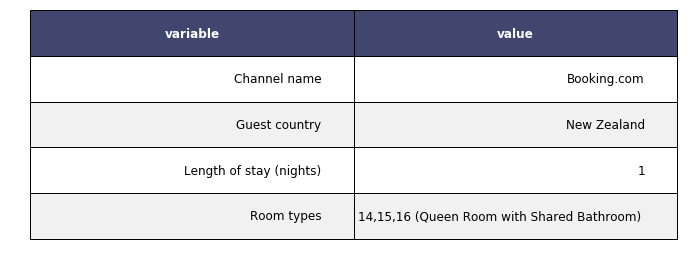

In [9]:
def render_mpl_table(data, col_width=3, row_height=0.6, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'],
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::3]) + np.array([0, 3])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

modal = render_mpl_table(rel, header_columns=0, col_width=2.9)
modal.figure.savefig('modal.png')

Visualisations - Number of guests by month... Nationalities in pie chart... 

In [10]:
relevantdata['Channel name'].value_counts(normalize=True) * 100

Booking.com          34.5762712
YHA New Zealand      30.5084746
Hostelworld Group    19.6610169
Extranet             13.2203390
Direct                2.0338983
Name: Channel name, dtype: float64

In [11]:
channel = pd.DataFrame(
    {"Name" : ['Booking.com', 'YHA New Zealand', 'Hostelworld Group', 'Extranet', 'Direct'],
    "Percentage" : [34.6, 30.5, 19.7, 13.2, 2.0]})
channel.head()

,Name,Percentage
0,Booking.com,34.6
1,YHA New Zealand,30.5
2,Hostelworld Group,19.7
3,Extranet,13.2
4,Direct,2.0


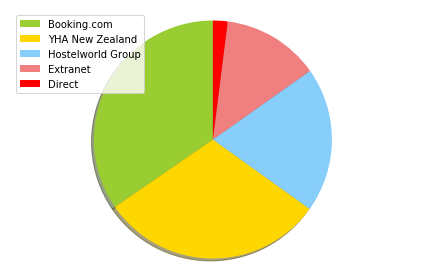

In [12]:
labels = ['Booking.com', 'YHA New Zealand', 'Hostelworld Group', 'Extranet', 'Direct']
sizes = [34.6, 30.5, 19.7, 13.2, 2.0]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()

fig = plt
fig.savefig('channel.png')

In [13]:
nationalities = relevantdata['Guest country'].value_counts(normalize=True) * 100
nationalities.head()

New Zealand       23.6559140
United Kingdom    20.4301075
Australia         13.9784946
Germany           11.8279570
France             5.3763441
Name: Guest country, dtype: float64

In [14]:
type(nationalities)

pandas.core.series.Series

In [20]:
natdf = pd.DataFrame({'Country':nationalities.index, 'Percentage':nationalities.values})
df

,Country,Percentage
0,New Zealand,23.6559140
1,United Kingdom,20.4301075
2,Australia,13.9784946
3,Germany,11.8279570
4,France,5.3763441
5,Japan,5.3763441
6,Canada,3.2258065
7,Israel,2.1505376
8,United States,2.1505376
9,Russian Federation,2.1505376


In [16]:
natdf = nationalities.to_frame()
natdf.head()

,Guest country
New Zealand,23.6559140
United Kingdom,20.4301075
Australia,13.9784946
Germany,11.8279570
France,5.3763441


In [19]:
natdf.rename( columns={' ':'Guest Country', 'Guest country':'Percentage'}, inplace=True )
natdf.head()

,Percentage
New Zealand,23.6559140
United Kingdom,20.4301075
Australia,13.9784946
Germany,11.8279570
France,5.3763441


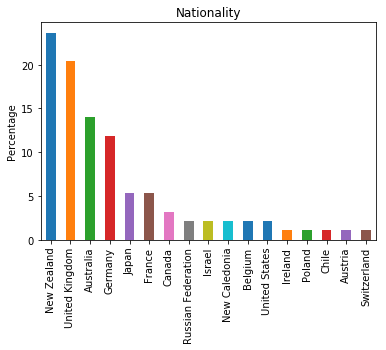

In [23]:
nationalities = relevantdata['Guest country'].value_counts(normalize=True) * 100
nationalities.head()

nat = nationalities.plot.bar()
plt.ylabel('Percentage')
plt.title('Nationality')

nat.figure.savefig('nationality.png')

In [17]:
natdf = pd.DataFrame(nationalities, columns =["Guest Country", "Percentage"])
natdf.head()

nat = nationalities.plot.bar()
plt.ylabel('Percentage')
plt.title('Nationality')

nat.figure.savefig('nationality.png')

rooms = relevantdata['Room types'].value_counts(normalize=True) * 100
rooms.head()

14,15,16 (Queen Room with Shared Bathroom)     13.8983051
'8,9 ( Family Room ensuited)                    9.8305085
10,11,19 (8 Bed mixed dorm, Bunks)              9.8305085
'7B (4 Bed Female Dorm with Ensuite)            8.1355932
'5,6 (Pod bed in 10 share ensuite)              7.1186441
Name: Room types, dtype: float64

In [18]:
roomspop = rooms.head(10)
roomspop

14,15,16 (Queen Room with Shared Bathroom)       13.8983051
'8,9 ( Family Room ensuited)                      9.8305085
10,11,19 (8 Bed mixed dorm, Bunks)                9.8305085
'7B (4 Bed Female Dorm with Ensuite)              8.1355932
'5,6 (Pod bed in 10 share ensuite)                7.1186441
'2 (12 bed dorm ensuite)                          6.1016949
18,Twin/APT (Twin room with Shared Bathroom)      6.1016949
'3B,4B,20 (4 Bed mixed dorm)                      5.7627119
17 (Single Room with Shared Bathroom)             5.4237288
'3,4 (5 Bed Mixed Dorm)                           4.0677966
Name: Room types, dtype: float64

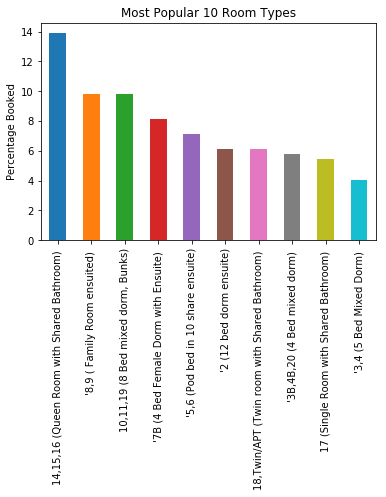

In [19]:
room = roomspop.plot.bar()
plt.ylabel('Percentage Booked')
plt.title('Most Popular 10 Room Types')

room.figure.savefig('room.png')

SyntaxError: invalid syntax (<ipython-input-26-5efc0c30d6a1>, line 1)